# Finding Expatriate Restaurants in the Capital of Thai Cuisine #

### Thai food is excellent but as a tourist sometimes when you are in the "land of smiles" you need to go back to more familiar fare 
### Let's search the 50 districts of Bangkok to see what the international options are ###

### Install numpy, pandas and forge ###

In [1]:
import numpy as np 
import pandas as pd 

!conda install -c conda-forge lxml --yes
print("Libraries installed.")

Solving environment: ...working... done

# All requested packages already installed.

Libraries installed.


### Read the wikipedia file of 50 districts in Bangkok and coordinates ###

In [2]:
#Read the wikipedia webiste of list of districts in Bangkok with Latitude and Longitude
df = pd.read_html('https://en.wikipedia.org/wiki/List_of_districts_of_Bangkok')[0]

In [3]:
df.head()

,District(Khet),MapNr,Post-code,Thai,Popu-lation,No. ofSubdis-trictsKhwaeng,Latitude,Longitude
0,Bang Bon,50,10150,บางบอน,105161,4,13.659200,100.399100
1,Bang Kapi,6,10240,บางกะปิ,148465,2,13.765833,100.647778
2,Bang Khae,40,10160,บางแค,191781,4,13.696111,100.409444
3,Bang Khen,5,10220,บางเขน,189539,2,13.873889,100.596389
4,Bang Kho Laem,31,10120,บางคอแหลม,94956,3,13.693333,100.502500


In [4]:
df.dtypes

District(Khet)                 object
MapNr                           int64
Post-code                       int64
Thai                           object
Popu-lation                     int64
No. ofSubdis-trictsKhwaeng      int64
Latitude                      float64
Longitude                     float64
dtype: object

In [5]:
df.shape

(50, 8)

### Cleaning:  Remove the Unwanted Columns ###

In [6]:
df.drop("MapNr", axis=1, inplace=True)

In [7]:
df.drop("Post-code", axis=1, inplace=True)

In [8]:
df.drop("Thai", axis=1, inplace=True)

In [9]:
df.drop("No. ofSubdis-trictsKhwaeng", axis=1, inplace=True)

In [10]:
df.rename(columns={'District(Khet)':'District'}, inplace=True)

In [11]:
df.head()

,District,Popu-lation,Latitude,Longitude
0,Bang Bon,105161,13.659200,100.399100
1,Bang Kapi,148465,13.765833,100.647778
2,Bang Khae,191781,13.696111,100.409444
3,Bang Khen,189539,13.873889,100.596389
4,Bang Kho Laem,94956,13.693333,100.502500


In [12]:
df.shape

(50, 4)

### Install and use geospacial data from Foursquare ###

In [13]:
!conda install -c conda-forge geopy --yes

Solving environment: ...working... done

# All requested packages already installed.



In [14]:
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
geolocator = Nominatim(user_agent="Bangkok_Districts")

## Bankgok Neighborhood Clusters ##

In [15]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

print('Libraries imported.')

Solving environment: ...working... done

# All requested packages already installed.

Libraries imported.


### Find and confirm the coordinates of Bangkok ###

In [16]:
address = 'Bangkok'

geolocator = Nominatim(user_agent="Bangkok_Districts")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Bangkok are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Bangkok are 13.7544238, 100.4930399.


### Generate a map of the 50 districts in Bangkok ###

In [17]:
# create map of Cologne using latitude and longitude 
map_bangkok = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to the map
for lat, lng, label in zip(df['Latitude'], df['Longitude'], df['District']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_bangkok) 
    
map_bangkok

### Use Foursqure API to Analyze Neighborhoods ###

### My Foursquare Credentials and Versions ###

In [18]:
CLIENT_ID = '0550WQL02GCLLKBQ4SG4TQ1T1QAJ43POXA4A2L1RA3KBBVU0' # your Foursquare ID
CLIENT_SECRET = 'ZWTG33NCFJO3IMJG3N1EQCAAPNKQJ3APDDGXHHZ3N5WSIUE1' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 0550WQL02GCLLKBQ4SG4TQ1T1QAJ43POXA4A2L1RA3KBBVU0
CLIENT_SECRET:ZWTG33NCFJO3IMJG3N1EQCAAPNKQJ3APDDGXHHZ3N5WSIUE1


In [19]:
df.loc[0,'District']

'Bang Bon'

### Top 15 Venues in Bang Bon District within 700 meters ###

In [20]:

neighborhood_latitude = df.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = df.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = df.loc[0, 'District'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Bang Bon are 13.6592, 100.3991.


In [21]:
LIMIT = 15

radius = 700

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=0550WQL02GCLLKBQ4SG4TQ1T1QAJ43POXA4A2L1RA3KBBVU0&client_secret=ZWTG33NCFJO3IMJG3N1EQCAAPNKQJ3APDDGXHHZ3N5WSIUE1&v=20180604&ll=13.6592,100.3991&radius=700&limit=15'

In [22]:
results = requests.get(url).json()

In [23]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [24]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

<ipython-input-24-4243e3e1ab9c>:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues = json_normalize(venues) # flatten JSON


,name,categories,lat,lng
0,ขาหมูบางหว้า,Thai Restaurant,13.657136,100.395230
1,Irashaimase Japanese Restaurant,Japanese Restaurant,13.658358,100.401403
2,ส.สุขโภชนา,Chinese Restaurant,13.660358,100.404866
3,Lotus Express (โลตัส เอ็กซ์เพรส),Convenience Store,13.657839,100.397243
4,Bussabar Steak House,Bar,13.656856,100.404690
5,ลาบร้อยเอ็ด เสือเคหะ,Som Tum Restaurant,13.656436,100.404455
6,7-Eleven (เซเว่น อีเลฟเว่น),Convenience Store,13.656440,100.394178
7,ก๋วยเตี๋ยวปลา แม่ช้อนทอง,Noodle House,13.657938,100.396723
8,ต้าเกอ ก๋วยเตี๋ยวไก่,Asian Restaurant,13.661457,100.405019
9,Café Amazon (คาเฟ่ อเมซอน),Coffee Shop,13.660836,100.405246


In [25]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

10 venues were returned by Foursquare.


In [26]:
print ('{} unique categories in Bang Bon.'.format(nearby_venues['categories'].value_counts().shape[0]))

9 unique categories in Bang Bon.


In [27]:
print (nearby_venues['categories'].value_counts()[0:15])

Convenience Store      2
Bar                    1
Som Tum Restaurant     1
Japanese Restaurant    1
Noodle House           1
Chinese Restaurant     1
Thai Restaurant        1
Coffee Shop            1
Asian Restaurant       1
Name: categories, dtype: int64


###  Other Neighborhoods ###

In [28]:
def getNearbyVenues(names, latitudes, longitudes, radius=3000, LIMIT=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']

    
    return(nearby_venues)

In [29]:
Bangkok_venues = getNearbyVenues(names=df['District'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Bang Bon
Bang Kapi
Bang Khae
Bang Khen
Bang Kho Laem
Bang Khun Thian
Bang Na
Bang Phlat
Bang Rak
Bang Sue
Bangkok Noi
Bangkok Yai
Bueng Kum
Chatuchak
Chom Thong
Din Daeng
Don Mueang
Dusit
Huai Khwang
Khan Na Yao
Khlong Sam Wa
Khlong San
Khlong Toei
Lak Si
Lat Krabang
Lat Phrao
Min Buri
Nong Chok
Nong Khaem
Pathum Wan
Phasi Charoen
Phaya Thai
Phra Khanong
Phra Nakhon
Pom Prap Sattru Phai
Prawet
Rat Burana
Ratchathewi
Sai Mai
Samphanthawong
Saphan Sung
Sathon
Suan Luang
Taling Chan
Thawi Watthana
Thon Buri
Thung Khru
Wang Thonglang
Watthana
Yan Nawa


In [30]:
Bangkok_venues.shape

(4755, 7)

### Modify the dataset to show only restaurants that are not Thai or Asian ###
*Bangkok is the capital of Thailand and all districts have primarily Thai and Asian restaurants. These listings are filtered out so we see the other options that are of a more international flavor*

In [31]:
# Remove all categories that are not "Restaurant"
BKK_only_restaurant_ALL = Bangkok_venues[Bangkok_venues['Venue Category'].str.contains('Restaurant')].reset_index(drop=True)

# Remove all categories that are "Thai"
BKK_only_restaurant = BKK_only_restaurant_ALL[~BKK_only_restaurant_ALL['Venue Category'].str.contains('Thai')].reset_index(drop=True)
# Remove all categories that are "Asian"
BKK_only_restaurant = BKK_only_restaurant[~BKK_only_restaurant['Venue Category'].str.contains('Asian')].reset_index(drop=True)


In [32]:
# List of restaurants
BKK_only_restaurant_ALL.index = np.arange(1, len(BKK_only_restaurant_ALL )+1)
print('All Restaurants in Bangkok')
print (BKK_only_restaurant_ALL['Venue Category'].value_counts())

All Restaurants in Bangkok
Thai Restaurant                    394
Asian Restaurant                   136
Japanese Restaurant                123
Som Tum Restaurant                 112
Seafood Restaurant                  98
Hotpot Restaurant                   88
Chinese Restaurant                  82
Fast Food Restaurant                70
Restaurant                          65
Vietnamese Restaurant               38
Sushi Restaurant                    31
Italian Restaurant                  29
Shabu-Shabu Restaurant              28
Ramen Restaurant                    21
Halal Restaurant                    18
Korean Restaurant                   17
Dim Sum Restaurant                  15
Cantonese Restaurant                10
Vegetarian / Vegan Restaurant        9
French Restaurant                    6
Japanese Curry Restaurant            6
Tonkatsu Restaurant                  6
Indian Restaurant                    6
American Restaurant                  3
Dumpling Restaurant                  

In [33]:
#List of restaurants without Thai or Asian categories
BKK_only_restaurant.index = np.arange(1, len(BKK_only_restaurant )+1)
print('Removing the Thai and Asian Restaurants')
print (BKK_only_restaurant['Venue Category'].value_counts())

Removing the Thai and Asian Restaurants
Japanese Restaurant                123
Som Tum Restaurant                 112
Seafood Restaurant                  98
Hotpot Restaurant                   88
Chinese Restaurant                  82
Fast Food Restaurant                70
Restaurant                          65
Vietnamese Restaurant               38
Sushi Restaurant                    31
Italian Restaurant                  29
Shabu-Shabu Restaurant              28
Ramen Restaurant                    21
Halal Restaurant                    18
Korean Restaurant                   17
Dim Sum Restaurant                  15
Cantonese Restaurant                10
Vegetarian / Vegan Restaurant        9
Tonkatsu Restaurant                  6
Indian Restaurant                    6
French Restaurant                    6
Japanese Curry Restaurant            6
Satay Restaurant                     3
Dumpling Restaurant                  3
American Restaurant                  3
Cajun / Creole Restauran

From here we will use the modifed list without Thai and Asian restaurants

In [34]:
print('There are {} unique categories.'.format(len(BKK_only_restaurant['Venue Category'].unique())))

There are 39 unique categories.


### Explore the types of restauants in the "Fast Food Category"
*We see the fast food is typical American fare; A&W, Burger King, KFC, Etc*

In [36]:
BKK_Fastfood = BKK_only_restaurant.loc[BKK_only_restaurant['Venue Category'].str.contains('Fast'), ['Venue']]
BKK_Fastfood.groupby("Venue")["Venue"].count()

Venue
A&W (เอ แอนด์ ดับบลิว)                          1
A&W (เอแอนด์ดับบลิว)                            3
Burger King                                     1
Burger King (เบอร์เกอร์ คิง)                   12
Burger King (เบอร์เกอร์คิง)                     3
Chester's (เชสเตอร์)                            2
Chester's Grill (เชสเตอร์ กริลล์)               1
Chester's Grill (เชสเตอร์กริลล์)                1
KFC                                             3
KFC (เคเอฟซี)                                  22
KFC drive thru                                  1
McDonald's                                      1
McDonald's & McCafé (แมคโดนัลด์ & แมคคาเฟ่)    11
McDonald's (แมคโดนัลด์)                         4
McDonald's (แม็คโดนัลด์)                        3
เคเอฟซี                                         1
Name: Venue, dtype: int64

## Top 20 international restaurants type in Bankok ##
*Actually Som Tum is Northern Thailand / Laos but let's consider it more an international syle.  <br>The "Restaurant" category is typically a mix of western and Thai dishes on the menu*

In [37]:

# create a dataframe of top 20 categories
BKK_Top20 = BKK_only_restaurant['Venue Category'].value_counts()[0:20].to_frame(name='frequency')
BKK_Top20=BKK_Top20.reset_index()
BKK_Top20.rename(index=str, columns={"index": "Venue_Category", "frequency": "Frequency"}, inplace=True)
BKK_Top20

,Venue_Category,Frequency
0,Japanese Restaurant,123
1,Som Tum Restaurant,112
2,Seafood Restaurant,98
3,Hotpot Restaurant,88
4,Chinese Restaurant,82
5,Fast Food Restaurant,70
6,Restaurant,65
7,Vietnamese Restaurant,38
8,Sushi Restaurant,31
9,Italian Restaurant,29


In [40]:
import seaborn as sns
from matplotlib import pyplot as plt

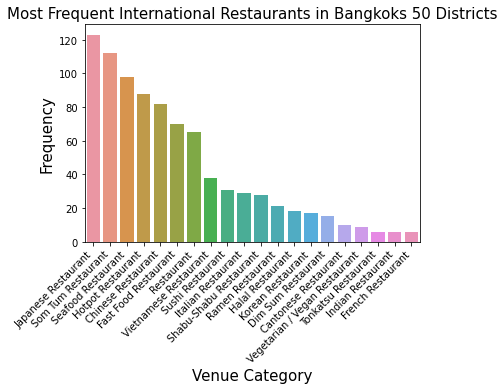

<Figure size 1296x504 with 0 Axes>

In [41]:
s=sns.barplot(x="Venue_Category", y="Frequency", data=BKK_Top20)
s.set_xticklabels(s.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title('Most Frequent International Restaurants in Bangkoks 50 Districts', fontsize=15)
plt.xlabel("Venue Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Most_Freq_Venues1.png", dpi=300)
fig = plt.figure(figsize=(18,7))
plt.show()

In [44]:
print ("Shape of the Data-Frame with Venue Category only Restaurant: ", BKK_only_restaurant.shape)
BKK_only_restaurant.head(75)

Shape of the Data-Frame with Venue Category only Restaurant:  (907, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1,Bang Bon,13.659200,100.399100,Burger King (เบอร์เกอร์คิง),13.670830,100.405089,Fast Food Restaurant
2,Bang Bon,13.659200,100.399100,KFC,13.670449,100.405502,Fast Food Restaurant
3,Bang Bon,13.659200,100.399100,ข้าวต้มปลาครัวบ้านเจ๊ใหญ่,13.650790,100.405286,Seafood Restaurant
4,Bang Bon,13.659200,100.399100,หมูสะเต๊ะแม่กำไร,13.653672,100.391620,Satay Restaurant
5,Bang Bon,13.659200,100.399100,ส.สุขโภชนา,13.660358,100.404866,Chinese Restaurant
6,Bang Bon,13.659200,100.399100,MK (เอ็มเค),13.647845,100.419739,Hotpot Restaurant
7,Bang Bon,13.659200,100.399100,Sushi Yoi (ซูชิโยอิ),13.673485,100.388758,Japanese Restaurant
8,Bang Bon,13.659200,100.399100,A&W (เอแอนด์ดับบลิว),13.671009,100.405293,Fast Food Restaurant
9,Bang Bon,13.659200,100.399100,Irashaimase Japanese Restaurant,13.658358,100.401403,Japanese Restaurant
10,Bang Bon,13.659200,100.399100,ก๋วยจั๊บ ๔๐ ปี (ก๋วยจั๊บ ตรอกจันทร์),13.664779,100.409404,Chinese Restaurant


In [45]:
BKK_restaurant = BKK_only_restaurant.groupby(['Neighborhood'])['Venue Category'].apply(lambda x: x[x.str.contains('Restaurant')].count())

In [46]:
BKK_restaurant

Neighborhood
Bang Bon                20
Bang Kapi               19
Bang Khae               24
Bang Khen               21
Bang Kho Laem           16
Bang Khun Thian         21
Bang Na                 19
Bang Phlat              15
Bang Rak                17
Bang Sue                16
Bangkok Noi             25
Bangkok Yai             17
Bueng Kum               20
Chatuchak               20
Chom Thong              21
Din Daeng               27
Don Mueang              12
Dusit                   14
Huai Khwang             28
Khan Na Yao             27
Khlong Sam Wa           18
Khlong San              19
Khlong Toei             23
Lak Si                  21
Lat Krabang             19
Lat Phrao               22
Min Buri                11
Nong Chok                1
Nong Khaem              16
Pathum Wan              10
Phasi Charoen           17
Phaya Thai              30
Phra Khanong            24
Phra Nakhon              8
Pom Prap Sattru Phai     9
Prawet                  12
Rat Burana     

In [47]:
BKK_restaurant_df  = BKK_restaurant.to_frame().reset_index()
BKK_restaurant_df.columns = ['Neighborhood', 'Number of Restaurant']
BKK_restaurant_df.index = np.arange(1, len(BKK_restaurant_df)+1)
list_rest_no =BKK_restaurant_df['Number of Restaurant'].to_list()
list_dist =BKK_restaurant_df['Neighborhood'].to_list()

In [48]:
# one hot encoding
BKK_onehot = pd.get_dummies(BKK_only_restaurant[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
BKK_onehot['Neighborhood'] = BKK_only_restaurant['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [BKK_onehot.columns[-1]] + list(BKK_onehot.columns[:-1])
BKK_onehot = BKK_onehot[fixed_columns]

BKK_onehot.head()

,Neighborhood,American Restaurant,Australian Restaurant,Cajun / Creole Restaurant,Cantonese Restaurant,Chinese Restaurant,Dim Sum Restaurant,Donburi Restaurant,Dumpling Restaurant,Eastern European Restaurant,Fast Food Restaurant,French Restaurant,German Restaurant,Greek Restaurant,Hainan Restaurant,Halal Restaurant,Hotpot Restaurant,Indian Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Kaiseki Restaurant,Korean Restaurant,Mexican Restaurant,Modern European Restaurant,Molecular Gastronomy Restaurant,Ramen Restaurant,Restaurant,Satay Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Soba Restaurant,Som Tum Restaurant,Sushi Restaurant,Swiss Restaurant,Tonkatsu Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Yoshoku Restaurant
1,Bang Bon,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Bang Bon,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Bang Bon,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Bang Bon,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5,Bang Bon,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [49]:
# New dataframe size.
BKK_onehot.shape

(907, 40)

In [50]:
BKK_grouped = BKK_onehot.groupby('Neighborhood').mean().reset_index()
BKK_grouped

,Neighborhood,American Restaurant,Australian Restaurant,Cajun / Creole Restaurant,Cantonese Restaurant,Chinese Restaurant,Dim Sum Restaurant,Donburi Restaurant,Dumpling Restaurant,Eastern European Restaurant,Fast Food Restaurant,French Restaurant,German Restaurant,Greek Restaurant,Hainan Restaurant,Halal Restaurant,Hotpot Restaurant,Indian Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Kaiseki Restaurant,Korean Restaurant,Mexican Restaurant,Modern European Restaurant,Molecular Gastronomy Restaurant,Ramen Restaurant,Restaurant,Satay Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Soba Restaurant,Som Tum Restaurant,Sushi Restaurant,Swiss Restaurant,Tonkatsu Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Yoshoku Restaurant
0,Bang Bon,0.000000,0.000000,0.000000,0.050000,0.100000,0.000000,0.000000,0.000000,0.000000,0.300000,0.000000,0.00,0.000000,0.00,0.000000,0.100000,0.000000,0.000000,0.000000,0.150000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.050000,0.050000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.050000,0.050000,0.00
1,Bang Kapi,0.000000,0.000000,0.000000,0.000000,0.052632,0.000000,0.000000,0.000000,0.000000,0.105263,0.000000,0.00,0.000000,0.00,0.105263,0.052632,0.000000,0.000000,0.052632,0.210526,0.000000,0.000000,0.000000,0.00,0.000000,0.052632,0.052632,0.000000,0.052632,0.052632,0.000000,0.105263,0.000000,0.000000,0.000000,0.000000,0.000000,0.105263,0.00
2,Bang Khae,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.00,0.000000,0.00,0.000000,0.125000,0.000000,0.000000,0.000000,0.125000,0.000000,0.000000,0.000000,0.00,0.000000,0.083333,0.041667,0.000000,0.083333,0.041667,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
3,Bang Khen,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.047619,0.000000,0.00,0.000000,0.00,0.047619,0.238095,0.000000,0.000000,0.000000,0.095238,0.000000,0.000000,0.000000,0.00,0.000000,0.047619,0.047619,0.000000,0.095238,0.047619,0.000000,0.190476,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.00
4,Bang Kho Laem,0.000000,0.000000,0.000000,0.000000,0.187500,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.062500,0.187500,0.062500,0.000000,0.000000,0.062500,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.062500,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,0.00
5,Bang Khun Thian,0.000000,0.000000,0.000000,0.000000,0.095238,0.000000,0.000000,0.000000,0.000000,0.095238,0.000000,0.00,0.000000,0.00,0.000000,0.190476,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.142857,0.000000,0.142857,0.000000,0.000000,0.095238,0.047619,0.000000,0.000000,0.000000,0.000000,0.047619,0.00
6,Bang Na,0.000000,0.052632,0.000000,0.000000,0.105263,0.052632,0.000000,0.052632,0.000000,0.157895,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.157895,0.000000,0.052632,0.000000,0.052632,0.000000,0.00,0.000000,0.000000,0.052632,0.000000,0.105263,0.052632,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.105263,0.00
7,Bang Phlat,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.200000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.133333,0.000000,0.066667,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
8,Bang Rak,0.000000,0.000000,0.000000,0.000000,0.117647,0.000000,0.000000,0.000000,0.000000,0.000000,0.117647,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.117647,0.117647,0.058824,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.176471,0.000000,0.117647,0.000000,0.000000,0.117647,0.000000,0.000000,0.058824,0.000000,0.000000,0.000000,0.00
9,Bang Sue,0.000000,0.000000,0.000000,0.062500,0.062500,0.062500,0.000000,

In [51]:
BKK_grouped.shape

(50, 40)

### Print the neighbourhoods with their respective top 10 most common venues ###

In [52]:

num_top_venues = 10

for hood in BKK_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = BKK_grouped[BKK_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Bang Bon----
                           venue  freq
0           Fast Food Restaurant  0.30
1            Japanese Restaurant  0.15
2             Chinese Restaurant  0.10
3             Som Tum Restaurant  0.10
4              Hotpot Restaurant  0.10
5             Seafood Restaurant  0.05
6          Vietnamese Restaurant  0.05
7           Cantonese Restaurant  0.05
8  Vegetarian / Vegan Restaurant  0.05
9               Satay Restaurant  0.05


----Bang Kapi----
                       venue  freq
0        Japanese Restaurant  0.21
1           Halal Restaurant  0.11
2      Vietnamese Restaurant  0.11
3       Fast Food Restaurant  0.11
4         Som Tum Restaurant  0.11
5         Chinese Restaurant  0.05
6           Ramen Restaurant  0.05
7  Japanese Curry Restaurant  0.05
8                 Restaurant  0.05
9          Hotpot Restaurant  0.05


----Bang Khae----
                    venue  freq
0    Fast Food Restaurant  0.25
1     Japanese Restaurant  0.12
2      Chinese Restaurant  0.12
3

### Create a Pandas Dataframe ###

In [53]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [54]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = BKK_grouped['Neighborhood']

for ind in np.arange(BKK_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(BKK_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(23)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bang Bon,Fast Food Restaurant,Japanese Restaurant,Chinese Restaurant,Som Tum Restaurant,Hotpot Restaurant,Cantonese Restaurant,Seafood Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Satay Restaurant
1,Bang Kapi,Japanese Restaurant,Som Tum Restaurant,Vietnamese Restaurant,Fast Food Restaurant,Halal Restaurant,Chinese Restaurant,Japanese Curry Restaurant,Shabu-Shabu Restaurant,Seafood Restaurant,Hotpot Restaurant
2,Bang Khae,Fast Food Restaurant,Japanese Restaurant,Chinese Restaurant,Som Tum Restaurant,Hotpot Restaurant,Ramen Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Restaurant,Australian Restaurant
3,Bang Khen,Hotpot Restaurant,Som Tum Restaurant,Vietnamese Restaurant,Japanese Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Fast Food Restaurant,Ramen Restaurant,Restaurant,Halal Restaurant
4,Bang Kho Laem,Hotpot Restaurant,Chinese Restaurant,Seafood Restaurant,Dim Sum Restaurant,Vegetarian / Vegan Restaurant,Halal Restaurant,Restaurant,Japanese Restaurant,Indian Restaurant,Donburi Restaurant
5,Bang Khun Thian,Hotpot Restaurant,Seafood Restaurant,Restaurant,Japanese Restaurant,Som Tum Restaurant,Chinese Restaurant,Fast Food Restaurant,Sushi Restaurant,Vietnamese Restaurant,Cantonese Restaurant
6,Bang Na,Italian Restaurant,Fast Food Restaurant,Vietnamese Restaurant,Chinese Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Korean Restaurant,Restaurant,Japanese Restaurant,Dumpling Restaurant
7,Bang Phlat,Chinese Restaurant,Japanese Restaurant,Hotpot Restaurant,Restaurant,Som Tum Restaurant,Seafood Restaurant,Dim Sum Restaurant,Cantonese Restaurant,Donburi Restaurant,Dumpling Restaurant
8,Bang Rak,Restaurant,Italian Restaurant,Som Tum Restaurant,Japanese Curry Restaurant,French Restaurant,Seafood Restaurant,Chinese Restaurant,Japanese Restaurant,Tonkatsu Restaurant,Dim Sum Restaurant
9,Bang Sue,Som Tum Restaurant,Japanese Restaurant,Seafood Restaurant,Hotpot Restaurant,Cantonese Restaurant,Chinese Restaurant,Vegetarian / Vegan Restaurant,Dim Sum Restaurant,Shabu-Shabu Restaurant,Halal Restaurant


### Clustering with k-means ###

In [55]:
# set number of clusters (7 works best)
kclusters = 7

BKK_grouped_clustering = BKK_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(BKK_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([6, 1, 6, 4, 2, 2, 6, 2, 5, 4])

In [56]:
BKK_merged = df
BKK_merged.head(10)

,District,Popu-lation,Latitude,Longitude
0,Bang Bon,105161,13.659200,100.399100
1,Bang Kapi,148465,13.765833,100.647778
2,Bang Khae,191781,13.696111,100.409444
3,Bang Khen,189539,13.873889,100.596389
4,Bang Kho Laem,94956,13.693333,100.502500
5,Bang Khun Thian,165491,13.660833,100.435833
6,Bang Na,95912,13.680081,100.591800
7,Bang Phlat,99273,13.793889,100.505000
8,Bang Rak,45875,13.730833,100.524167
9,Bang Sue,132234,13.809722,100.537222


In [57]:
neighborhoods_venues_sorted.head(23)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bang Bon,Fast Food Restaurant,Japanese Restaurant,Chinese Restaurant,Som Tum Restaurant,Hotpot Restaurant,Cantonese Restaurant,Seafood Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Satay Restaurant
1,Bang Kapi,Japanese Restaurant,Som Tum Restaurant,Vietnamese Restaurant,Fast Food Restaurant,Halal Restaurant,Chinese Restaurant,Japanese Curry Restaurant,Shabu-Shabu Restaurant,Seafood Restaurant,Hotpot Restaurant
2,Bang Khae,Fast Food Restaurant,Japanese Restaurant,Chinese Restaurant,Som Tum Restaurant,Hotpot Restaurant,Ramen Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Restaurant,Australian Restaurant
3,Bang Khen,Hotpot Restaurant,Som Tum Restaurant,Vietnamese Restaurant,Japanese Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Fast Food Restaurant,Ramen Restaurant,Restaurant,Halal Restaurant
4,Bang Kho Laem,Hotpot Restaurant,Chinese Restaurant,Seafood Restaurant,Dim Sum Restaurant,Vegetarian / Vegan Restaurant,Halal Restaurant,Restaurant,Japanese Restaurant,Indian Restaurant,Donburi Restaurant
5,Bang Khun Thian,Hotpot Restaurant,Seafood Restaurant,Restaurant,Japanese Restaurant,Som Tum Restaurant,Chinese Restaurant,Fast Food Restaurant,Sushi Restaurant,Vietnamese Restaurant,Cantonese Restaurant
6,Bang Na,Italian Restaurant,Fast Food Restaurant,Vietnamese Restaurant,Chinese Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Korean Restaurant,Restaurant,Japanese Restaurant,Dumpling Restaurant
7,Bang Phlat,Chinese Restaurant,Japanese Restaurant,Hotpot Restaurant,Restaurant,Som Tum Restaurant,Seafood Restaurant,Dim Sum Restaurant,Cantonese Restaurant,Donburi Restaurant,Dumpling Restaurant
8,Bang Rak,Restaurant,Italian Restaurant,Som Tum Restaurant,Japanese Curry Restaurant,French Restaurant,Seafood Restaurant,Chinese Restaurant,Japanese Restaurant,Tonkatsu Restaurant,Dim Sum Restaurant
9,Bang Sue,Som Tum Restaurant,Japanese Restaurant,Seafood Restaurant,Hotpot Restaurant,Cantonese Restaurant,Chinese Restaurant,Vegetarian / Vegan Restaurant,Dim Sum Restaurant,Shabu-Shabu Restaurant,Halal Restaurant


In [58]:
neighborhoods_venues_sorted_w_clusters = neighborhoods_venues_sorted

In [59]:
neighborhoods_venues_sorted_w_clusters.head(30)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bang Bon,Fast Food Restaurant,Japanese Restaurant,Chinese Restaurant,Som Tum Restaurant,Hotpot Restaurant,Cantonese Restaurant,Seafood Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Satay Restaurant
1,Bang Kapi,Japanese Restaurant,Som Tum Restaurant,Vietnamese Restaurant,Fast Food Restaurant,Halal Restaurant,Chinese Restaurant,Japanese Curry Restaurant,Shabu-Shabu Restaurant,Seafood Restaurant,Hotpot Restaurant
2,Bang Khae,Fast Food Restaurant,Japanese Restaurant,Chinese Restaurant,Som Tum Restaurant,Hotpot Restaurant,Ramen Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Restaurant,Australian Restaurant
3,Bang Khen,Hotpot Restaurant,Som Tum Restaurant,Vietnamese Restaurant,Japanese Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Fast Food Restaurant,Ramen Restaurant,Restaurant,Halal Restaurant
4,Bang Kho Laem,Hotpot Restaurant,Chinese Restaurant,Seafood Restaurant,Dim Sum Restaurant,Vegetarian / Vegan Restaurant,Halal Restaurant,Restaurant,Japanese Restaurant,Indian Restaurant,Donburi Restaurant
5,Bang Khun Thian,Hotpot Restaurant,Seafood Restaurant,Restaurant,Japanese Restaurant,Som Tum Restaurant,Chinese Restaurant,Fast Food Restaurant,Sushi Restaurant,Vietnamese Restaurant,Cantonese Restaurant
6,Bang Na,Italian Restaurant,Fast Food Restaurant,Vietnamese Restaurant,Chinese Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Korean Restaurant,Restaurant,Japanese Restaurant,Dumpling Restaurant
7,Bang Phlat,Chinese Restaurant,Japanese Restaurant,Hotpot Restaurant,Restaurant,Som Tum Restaurant,Seafood Restaurant,Dim Sum Restaurant,Cantonese Restaurant,Donburi Restaurant,Dumpling Restaurant
8,Bang Rak,Restaurant,Italian Restaurant,Som Tum Restaurant,Japanese Curry Restaurant,French Restaurant,Seafood Restaurant,Chinese Restaurant,Japanese Restaurant,Tonkatsu Restaurant,Dim Sum Restaurant
9,Bang Sue,Som Tum Restaurant,Japanese Restaurant,Seafood Restaurant,Hotpot Restaurant,Cantonese Restaurant,Chinese Restaurant,Vegetarian / Vegan Restaurant,Dim Sum Restaurant,Shabu-Shabu Restaurant,Halal Restaurant


In [60]:
# add clustering labels
neighborhoods_venues_sorted_w_clusters.insert(0, 'Cluster Labels', kmeans.labels_)

In [61]:
neighborhoods_venues_sorted_w_clusters.head()

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,6,Bang Bon,Fast Food Restaurant,Japanese Restaurant,Chinese Restaurant,Som Tum Restaurant,Hotpot Restaurant,Cantonese Restaurant,Seafood Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Satay Restaurant
1,1,Bang Kapi,Japanese Restaurant,Som Tum Restaurant,Vietnamese Restaurant,Fast Food Restaurant,Halal Restaurant,Chinese Restaurant,Japanese Curry Restaurant,Shabu-Shabu Restaurant,Seafood Restaurant,Hotpot Restaurant
2,6,Bang Khae,Fast Food Restaurant,Japanese Restaurant,Chinese Restaurant,Som Tum Restaurant,Hotpot Restaurant,Ramen Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Restaurant,Australian Restaurant
3,4,Bang Khen,Hotpot Restaurant,Som Tum Restaurant,Vietnamese Restaurant,Japanese Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Fast Food Restaurant,Ramen Restaurant,Restaurant,Halal Restaurant
4,2,Bang Kho Laem,Hotpot Restaurant,Chinese Restaurant,Seafood Restaurant,Dim Sum Restaurant,Vegetarian / Vegan Restaurant,Halal Restaurant,Restaurant,Japanese Restaurant,Indian Restaurant,Donburi Restaurant


In [62]:
BKK_merged.rename(columns={'District':'Neighborhood'}, inplace=True)

BKK_merged = BKK_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

BKK_merged.head()

,Neighborhood,Popu-lation,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bang Bon,105161,13.659200,100.399100,6,Fast Food Restaurant,Japanese Restaurant,Chinese Restaurant,Som Tum Restaurant,Hotpot Restaurant,Cantonese Restaurant,Seafood Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Satay Restaurant
1,Bang Kapi,148465,13.765833,100.647778,1,Japanese Restaurant,Som Tum Restaurant,Vietnamese Restaurant,Fast Food Restaurant,Halal Restaurant,Chinese Restaurant,Japanese Curry Restaurant,Shabu-Shabu Restaurant,Seafood Restaurant,Hotpot Restaurant
2,Bang Khae,191781,13.696111,100.409444,6,Fast Food Restaurant,Japanese Restaurant,Chinese Restaurant,Som Tum Restaurant,Hotpot Restaurant,Ramen Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Restaurant,Australian Restaurant
3,Bang Khen,189539,13.873889,100.596389,4,Hotpot Restaurant,Som Tum Restaurant,Vietnamese Restaurant,Japanese Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Fast Food Restaurant,Ramen Restaurant,Restaurant,Halal Restaurant
4,Bang Kho Laem,94956,13.693333,100.502500,2,Hotpot Restaurant,Chinese Restaurant,Seafood Restaurant,Dim Sum Restaurant,Vegetarian / Vegan Restaurant,Halal Restaurant,Restaurant,Japanese Restaurant,Indian Restaurant,Donburi Restaurant


In [63]:
# create a map with folium
map_restaurants10 = folium.Map(location=[latitude,longitude], tiles='cartodbpositron', 
                               attr="<a href=https://github.com/python-visualization/folium/>Folium</a>")

# set color scheme for the five clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
for lat, lon, poi, cluster in zip(BKK_merged['Latitude'], 
                                  BKK_merged['Longitude'], 
                                  BKK_merged['Neighborhood'], 
                                  BKK_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=list_rest_no[list_dist.index(poi)]*0.5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_restaurants10)
       
map_restaurants10

### Examination of the 5 clusters ###

Now, we can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, we can then assign a name to each cluster.

### Cluster 0:  The Diverse Mix ###
#### Variety of Asian, Fast Food, Halal and Mediterranean ####

In [64]:
BKK_merged.loc[BKK_merged['Cluster Labels'] == 0, BKK_merged.columns[[1] + list(range(5, BKK_merged.shape[1]))]]

,Popu-lation,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
44,76351,Chinese Restaurant,Yoshoku Restaurant,Fast Food Restaurant,Indian Restaurant,Hotpot Restaurant,Halal Restaurant,Hainan Restaurant,Greek Restaurant,German Restaurant,French Restaurant


### Cluster 1:  The Japanese Restaurant Districts ###
#### Either the 1st or 2nd most common venue in these districts are Japanese Restaurants ####

In [65]:
BKK_merged.loc[BKK_merged['Cluster Labels'] == 1, BKK_merged.columns[[1] + list(range(5, BKK_merged.shape[1]))]]

,Popu-lation,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,148465,Japanese Restaurant,Som Tum Restaurant,Vietnamese Restaurant,Fast Food Restaurant,Halal Restaurant,Chinese Restaurant,Japanese Curry Restaurant,Shabu-Shabu Restaurant,Seafood Restaurant,Hotpot Restaurant
15,130220,Japanese Restaurant,Som Tum Restaurant,Sushi Restaurant,Hotpot Restaurant,Korean Restaurant,Restaurant,Donburi Restaurant,Vegetarian / Vegan Restaurant,Shabu-Shabu Restaurant,Seafood Restaurant
17,107655,Japanese Restaurant,Chinese Restaurant,Restaurant,Hotpot Restaurant,Sushi Restaurant,Som Tum Restaurant,Dim Sum Restaurant,Italian Restaurant,French Restaurant,Halal Restaurant
19,88678,Japanese Restaurant,Fast Food Restaurant,Seafood Restaurant,Sushi Restaurant,Hotpot Restaurant,Som Tum Restaurant,Restaurant,Udon Restaurant,Shabu-Shabu Restaurant,Tonkatsu Restaurant
20,169489,Restaurant,Japanese Restaurant,Som Tum Restaurant,Seafood Restaurant,Hotpot Restaurant,Vietnamese Restaurant,Fast Food Restaurant,Italian Restaurant,Cantonese Restaurant,Donburi Restaurant
22,109041,Japanese Restaurant,Italian Restaurant,Sushi Restaurant,Chinese Restaurant,Korean Restaurant,Ramen Restaurant,Indian Restaurant,Vietnamese Restaurant,Eastern European Restaurant,Restaurant
31,72952,Japanese Restaurant,Som Tum Restaurant,Restaurant,Sushi Restaurant,Dim Sum Restaurant,Mexican Restaurant,Italian Restaurant,Cantonese Restaurant,Chinese Restaurant,Shabu-Shabu Restaurant
37,73035,Japanese Restaurant,Som Tum Restaurant,Italian Restaurant,Vietnamese Restaurant,Molecular Gastronomy Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Hotpot Restaurant,Sushi Restaurant,Tonkatsu Restaurant
41,84916,Som Tum Restaurant,Japanese Restaurant,Italian Restaurant,Seafood Restaurant,Restaurant,French Restaurant,Modern European Restaurant,Cantonese Restaurant,Chinese Restaurant,Sushi Restaurant
48,81623,Japanese Restaurant,Italian Restaurant,Restaurant,Ramen Restaurant,Shabu-Shabu Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Kaiseki Restaurant,Korean Restaurant,Greek Restaurant


### Cluster 2:  The Chinese Hotpot Districts ###
#### In the top three most common venue in these districts are Chinese Hotpot ####

In [67]:
BKK_merged.loc[BKK_merged['Cluster Labels'] == 2, BKK_merged.columns[[1] + list(range(5, BKK_merged.shape[1]))]]

,Popu-lation,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,94956,Hotpot Restaurant,Chinese Restaurant,Seafood Restaurant,Dim Sum Restaurant,Vegetarian / Vegan Restaurant,Halal Restaurant,Restaurant,Japanese Restaurant,Indian Restaurant,Donburi Restaurant
5,165491,Hotpot Restaurant,Seafood Restaurant,Restaurant,Japanese Restaurant,Som Tum Restaurant,Chinese Restaurant,Fast Food Restaurant,Sushi Restaurant,Vietnamese Restaurant,Cantonese Restaurant
7,99273,Chinese Restaurant,Japanese Restaurant,Hotpot Restaurant,Restaurant,Som Tum Restaurant,Seafood Restaurant,Dim Sum Restaurant,Cantonese Restaurant,Donburi Restaurant,Dumpling Restaurant
12,145830,Japanese Restaurant,Seafood Restaurant,Hotpot Restaurant,Chinese Restaurant,Halal Restaurant,Restaurant,Fast Food Restaurant,Vietnamese Restaurant,Dim Sum Restaurant,Som Tum Restaurant
13,160906,Hotpot Restaurant,Som Tum Restaurant,Japanese Restaurant,Seafood Restaurant,Chinese Restaurant,Fast Food Restaurant,Restaurant,Japanese Curry Restaurant,Korean Restaurant,Yoshoku Restaurant
14,158005,Hotpot Restaurant,Chinese Restaurant,Seafood Restaurant,Som Tum Restaurant,Restaurant,Halal Restaurant,Sushi Restaurant,Ramen Restaurant,Eastern European Restaurant,Hainan Restaurant
25,122182,Hotpot Restaurant,Japanese Restaurant,Chinese Restaurant,Som Tum Restaurant,Restaurant,Seafood Restaurant,Halal Restaurant,Italian Restaurant,Vietnamese Restaurant,Korean Restaurant
26,137251,Seafood Restaurant,Hotpot Restaurant,Halal Restaurant,Fast Food Restaurant,Shabu-Shabu Restaurant,Japanese Restaurant,Dim Sum Restaurant,Donburi Restaurant,Dumpling Restaurant,Chinese Restaurant
28,150218,Hotpot Restaurant,Restaurant,Sushi Restaurant,Fast Food Restaurant,Som Tum Restaurant,Ramen Restaurant,Japanese Restaurant,Chinese Restaurant,Dim Sum Restaurant,Donburi Restaurant
36,86695,Hotpot Restaurant,Chinese Restaurant,Seafood Restaurant,Dim Sum Restaurant,Japanese Restaurant,Ramen Restaurant,Halal Restaurant,Vegetarian / Vegan Restaurant,Restaurant,Sushi Restaurant


## Cluster 3:  Generic Restaurants ###
#### Small Cluster with generic Restaurant and mix of international ####

In [68]:
BKK_merged.loc[BKK_merged['Cluster Labels'] == 3, BKK_merged.columns[[1] + list(range(5, BKK_merged.shape[1]))]]

,Popu-lation,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
27,157138,Restaurant,Yoshoku Restaurant,Japanese Curry Restaurant,Indian Restaurant,Hotpot Restaurant,Halal Restaurant,Hainan Restaurant,Greek Restaurant,German Restaurant,French Restaurant


## Cluster 4:  North-East Cuisine ###
#### In the top two most common venue in these districts are North-East Som Thum Restaurants ####

In [69]:
BKK_merged.loc[BKK_merged['Cluster Labels'] == 4, BKK_merged.columns[[1] + list(range(5, BKK_merged.shape[1]))]]

,Popu-lation,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,189539,Hotpot Restaurant,Som Tum Restaurant,Vietnamese Restaurant,Japanese Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Fast Food Restaurant,Ramen Restaurant,Restaurant,Halal Restaurant
9,132234,Som Tum Restaurant,Japanese Restaurant,Seafood Restaurant,Hotpot Restaurant,Cantonese Restaurant,Chinese Restaurant,Vegetarian / Vegan Restaurant,Dim Sum Restaurant,Shabu-Shabu Restaurant,Halal Restaurant
10,117793,Som Tum Restaurant,Hotpot Restaurant,Chinese Restaurant,Seafood Restaurant,Japanese Restaurant,Ramen Restaurant,Shabu-Shabu Restaurant,Sushi Restaurant,Fast Food Restaurant,Halal Restaurant
18,78175,Som Tum Restaurant,Japanese Restaurant,Vietnamese Restaurant,Korean Restaurant,Seafood Restaurant,Hotpot Restaurant,Dim Sum Restaurant,Chinese Restaurant,Indian Restaurant,Fast Food Restaurant
24,163175,Som Tum Restaurant,Fast Food Restaurant,Japanese Restaurant,Seafood Restaurant,Italian Restaurant,Vietnamese Restaurant,Sushi Restaurant,Dim Sum Restaurant,Shabu-Shabu Restaurant,Hotpot Restaurant
30,129827,Japanese Restaurant,Som Tum Restaurant,Fast Food Restaurant,Hotpot Restaurant,Ramen Restaurant,Vietnamese Restaurant,Donburi Restaurant,Shabu-Shabu Restaurant,Seafood Restaurant,Chinese Restaurant
32,93482,Japanese Restaurant,Som Tum Restaurant,Vietnamese Restaurant,Italian Restaurant,Ramen Restaurant,Shabu-Shabu Restaurant,Fast Food Restaurant,Chinese Restaurant,Hotpot Restaurant,Dumpling Restaurant
33,57876,Som Tum Restaurant,Japanese Restaurant,Vietnamese Restaurant,Hotpot Restaurant,Fast Food Restaurant,Italian Restaurant,Seafood Restaurant,Dim Sum Restaurant,Donburi Restaurant,Dumpling Restaurant
35,160671,Som Tum Restaurant,Fast Food Restaurant,Restaurant,Seafood Restaurant,Vietnamese Restaurant,Halal Restaurant,Hotpot Restaurant,Chinese Restaurant,Dim Sum Restaurant,Donburi Restaurant
38,188123,Vietnamese Restaurant,Restaurant,Som Tum Restaurant,Italian Restaurant,Fast Food Restaurant,Yoshoku Restaurant,Hotpot Restaurant,Halal Restaurant,Hainan Restaurant,Greek Restaurant


## Cluster 5:  The Seafood Districts ###
#### Seafood is common to these districts ####

In [70]:
BKK_merged.loc[BKK_merged['Cluster Labels'] == 5, BKK_merged.columns[[1] + list(range(5, BKK_merged.shape[1]))]]

,Popu-lation,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,45875,Restaurant,Italian Restaurant,Som Tum Restaurant,Japanese Curry Restaurant,French Restaurant,Seafood Restaurant,Chinese Restaurant,Japanese Restaurant,Tonkatsu Restaurant,Dim Sum Restaurant
11,72321,Seafood Restaurant,Japanese Restaurant,Chinese Restaurant,Vegetarian / Vegan Restaurant,Som Tum Restaurant,Vietnamese Restaurant,Fast Food Restaurant,Hotpot Restaurant,Cantonese Restaurant,Dim Sum Restaurant
21,76446,Seafood Restaurant,Chinese Restaurant,Som Tum Restaurant,Japanese Restaurant,Shabu-Shabu Restaurant,Hotpot Restaurant,French Restaurant,Restaurant,Indian Restaurant,Italian Restaurant
29,53263,Seafood Restaurant,Japanese Restaurant,Molecular Gastronomy Restaurant,Japanese Curry Restaurant,Tonkatsu Restaurant,Som Tum Restaurant,Hotpot Restaurant,Restaurant,Hainan Restaurant,Greek Restaurant
34,51006,Seafood Restaurant,Som Tum Restaurant,Sushi Restaurant,Vietnamese Restaurant,Japanese Restaurant,Chinese Restaurant,Cantonese Restaurant,Cajun / Creole Restaurant,Dim Sum Restaurant,Donburi Restaurant
39,27452,Seafood Restaurant,Chinese Restaurant,Som Tum Restaurant,Japanese Restaurant,French Restaurant,Restaurant,Indian Restaurant,Italian Restaurant,Cantonese Restaurant,Tonkatsu Restaurant
45,119708,Chinese Restaurant,Seafood Restaurant,Satay Restaurant,Shabu-Shabu Restaurant,Vietnamese Restaurant,Fast Food Restaurant,Hotpot Restaurant,Indian Restaurant,Som Tum Restaurant,Cantonese Restaurant


## Cluster 6:  The Fast Food Districts ###
#### Fast Food is in the top two most common venues in these districts ####

In [71]:
BKK_merged.loc[BKK_merged['Cluster Labels'] == 6, BKK_merged.columns[[1] + list(range(5, BKK_merged.shape[1]))]]

,Popu-lation,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,105161,Fast Food Restaurant,Japanese Restaurant,Chinese Restaurant,Som Tum Restaurant,Hotpot Restaurant,Cantonese Restaurant,Seafood Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Satay Restaurant
2,191781,Fast Food Restaurant,Japanese Restaurant,Chinese Restaurant,Som Tum Restaurant,Hotpot Restaurant,Ramen Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Restaurant,Australian Restaurant
6,95912,Italian Restaurant,Fast Food Restaurant,Vietnamese Restaurant,Chinese Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Korean Restaurant,Restaurant,Japanese Restaurant,Dumpling Restaurant
16,166261,Fast Food Restaurant,Restaurant,Japanese Restaurant,Som Tum Restaurant,Eastern European Restaurant,Shabu-Shabu Restaurant,Seafood Restaurant,Chinese Restaurant,Dim Sum Restaurant,Donburi Restaurant
23,109770,Fast Food Restaurant,Japanese Restaurant,Hotpot Restaurant,Som Tum Restaurant,Vietnamese Restaurant,Seafood Restaurant,Korean Restaurant,Restaurant,Dumpling Restaurant,Sushi Restaurant
40,89825,Japanese Restaurant,Fast Food Restaurant,Halal Restaurant,Chinese Restaurant,Hotpot Restaurant,Seafood Restaurant,Swiss Restaurant,Dim Sum Restaurant,Shabu-Shabu Restaurant,Donburi Restaurant
